In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [57]:
# Read the city data
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [56]:
# Read the ride data
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [37]:
print("Rows that are not null:")
print(city_data_df.count())

Rows that are not null:
city            120
driver_count    120
type            120
dtype: int64


In [35]:
print("Number of null values:")
print(city_data_df.isnull().sum())
print("\nData types:")
print(city_data_df.dtypes)

Number of null values:
city            0
driver_count    0
type            0
dtype: int64

Data types:
city            object
driver_count     int64
type            object
dtype: object


In [38]:
print("Number of null values:")
print(ride_data_df.isnull().sum())
print("\nData types:")
print(ride_data_df.dtypes)

Number of null values:
city       0
date       0
fare       0
ride_id    0
dtype: int64

Data types:
city        object
date        object
fare       float64
ride_id      int64
dtype: object


In [31]:
print("Data Point Count by City Type:")
print(city_data_df['type'].value_counts())

Data Point Count by City Type:
Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64


#### Merging Dataframes

In [53]:
pyber_data_df = pd.merge(ride_data_df, city_data_df, on=['city', 'city'], how='left')
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Creating a Bubble Chart

### Chart Data

###### Creating new dataframes separated by city type

In [121]:
urban_cities_df = pyber_data_df[pyber_data_df['type'] == "Urban"]
rural_cities_df = pyber_data_df[pyber_data_df['type'] == "Rural"]
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == "Suburban"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


##### The total number of rides for each city by each type of city (x-axis)

In [122]:
#returns a series of the number of rides per city
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

##### The average fare for each city (y-axis)

In [112]:
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

###### average number of drivers for each city


In [119]:
#Will be used to correlate circle size
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

### Urban City Bubble Chart

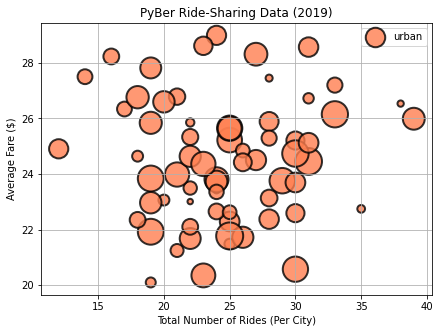

In [149]:
#Scatter plot for urban cities
plt.figure(figsize=(7,5))
plt.scatter(urban_ride_count,
            urban_avg_fare,
            s=urban_driver_count*10,
            c='coral',
            edgecolor='black',
            linewidths=2,
            alpha=0.8,
            label='urban')

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

plt.show()

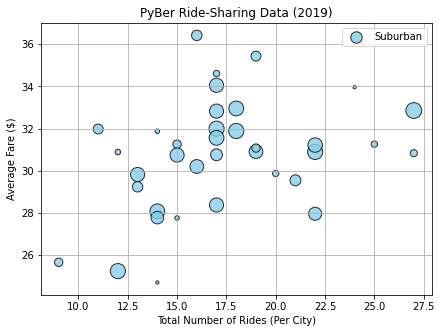

In [152]:
# scatter plot for suburban cities.
plt.figure(figsize=(7,5))
plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
plt.show()

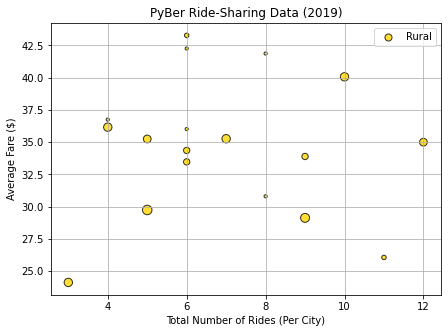

In [154]:
#Scatter plot for rural cities.
plt.figure(figsize=(7,5))
plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()
plt.show()